# Exploratory Data Analysis (EDA) and its steps.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../Datasets/EDA/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 1. Null Value Removal

In [2]:
df.shape

(11914, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.isna().sum() / df.shape[0] * 100

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

In [5]:
df['Market Category'].mode()

0    Crossover
Name: Market Category, dtype: object

In [12]:
df['Market Category'].value_counts().head()

Market Category
Crossover             4852
Flex Fuel              872
Luxury                 855
Luxury,Performance     673
Hatchback              641
Name: count, dtype: int64

In [7]:
df['Market Category'].loc[df[df['Market Category'].isna()].index] = 'Crossover'

C:\Users\HP\AppData\Local\Temp\ipykernel_31372\3680913628.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Market Category'].loc[df[df['Market Category'].isna()].index] = 'Crossover'
C:\Users\HP\AppData\Local\Temp\ipykernel_31372\3680

In [8]:
np.round(df['Engine Cylinders'].mean())

np.float64(6.0)

In [9]:
df['Engine Cylinders'].loc[df[df['Engine Cylinders'].isna()].index] = np.round(df['Engine Cylinders'].mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_31372\903604844.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Engine Cylinders'].loc[df[df['Engine Cylinders'].isna()].index] = np.round(df['Engine Cylinders'].mean())
C:\Users\HP\AppData\Lo

In [10]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [27]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [45]:
def remove_na(columns: list):
    total = 0
    for column in columns:
        if column in df.columns:
            drop_count = df[df[column].isna()].shape[0]
            df.drop(df[df[column].isna()].index, inplace = True)
            print(f'removed {drop_count} entries for {column}.')
            total += drop_count
        else:
            print(f'{column} is not present in DataFrame.')

In [44]:
# df.drop(df[df['Engine HP'].isna()].index, inplace = True)
remove_na(['Engine HP', 'Engine Fuel Type', 'Number of Doors', 'YOYOY'])

removed 0 entries for Engine HP.
removed 0 entries for Engine Fuel Type.
removed 0 entries for Number of Doors.
YOYOY is not present in DataFrame.


In [58]:
df.reset_index(drop = True, inplace = True)
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11121,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11122,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11123,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11124,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11125,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11841 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11841 non-null  object 
 1   Model              11841 non-null  object 
 2   Year               11841 non-null  int64  
 3   Engine Fuel Type   11841 non-null  object 
 4   Engine HP          11841 non-null  float64
 5   Engine Cylinders   11841 non-null  float64
 6   Transmission Type  11841 non-null  object 
 7   Driven_Wheels      11841 non-null  object 
 8   Number of Doors    11841 non-null  float64
 9   Market Category    11841 non-null  object 
 10  Vehicle Size       11841 non-null  object 
 11  Vehicle Style      11841 non-null  object 
 12  highway MPG        11841 non-null  int64  
 13  city mpg           11841 non-null  int64  
 14  Popularity         11841 non-null  int64  
 15  MSRP               11841 non-null  int64  
dtypes: float64(3), int64(5), ob

In [18]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2. Drop Duplicate Rows

In [56]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11121,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11122,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11123,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11124,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11125,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3. Outlier Handling

In [64]:
# checking quartile values.

print(f'Q25: {df['Engine HP'].quantile(0.25)}')
print(f'Q50: {df['Engine HP'].quantile(0.50)}')
print(f'Q75: {df['Engine HP'].quantile(0.75)}')

Q25: 172.0
Q50: 239.0
Q75: 303.0


In [ ]:
# Box Plot Method requires the following:
# 1. IQR(InterQuartile Range): Q3 - Q1
# 2. Lower Bound: Q1 - IQR * 1.5
# 2. Upper Bound: Q3 + IQR * 1.5

# for df['Engine HP']
q1 = df['Engine HP'].quantile(0.25)
q3 = df['Engine HP'].quantile(0.75)

iqr = q3 - q1
lower_outliers = q1 - iqr * 1.5
upper_outliers = q3 + iqr * 1.5

iqr, lower_outliers, upper_outliers

(np.float64(131.0), np.float64(-24.5), np.float64(499.5))

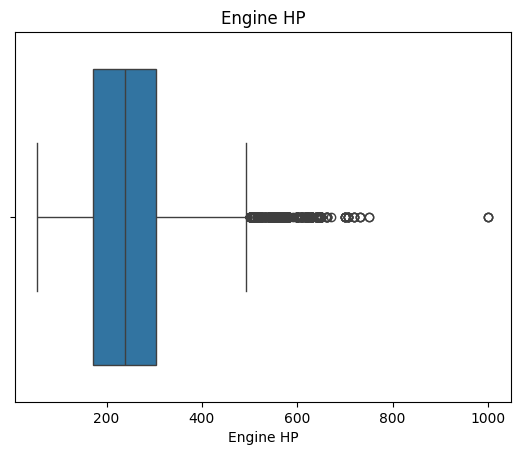

In [74]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.boxplot(df, x = 'Engine HP')
plt.title('Engine HP')
plt.show()

In [72]:
df[df['Engine HP'] > 499.5]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
447,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
448,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
449,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
450,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000
451,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,BMW,X5 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
10726,BMW,X5 M,2017,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
10739,BMW,X6 M,2015,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102100
10740,BMW,X6 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102200
